## 数据探索

观察数据的各种特征，包括数据的分布、缺失值、异常值等等。以及分布情况

In [1]:
# import seaborn and pandas
import seaborn as sns
import pandas as pd


# read data from 'train.csv'
raw = pd.read_csv('train.csv')

raw.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


我们有keyword、location、text、target四个特征，其中keyword和location是缺失值，target是我们的目标值，text是我们的文本数据。

发现，keyword和location数据缺失严重。text数据没有缺失，也没有重复的数据。

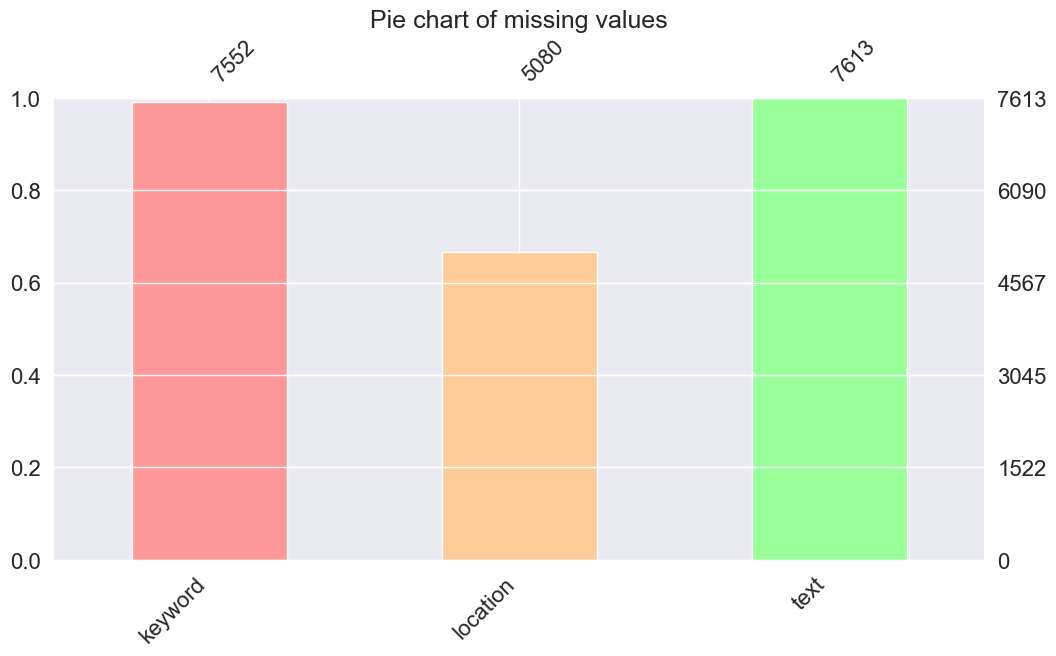

In [17]:
# 分析 数据中 keyword、location、text 的缺失值
# 使用 seaborn 和matplotlib 绘制饼状图，查看两者缺失值的比例
import matplotlib.pyplot as plt
import missingno as msno

# 绘制 keyword 缺失比例的饼状图
plt.title("Pie chart of missing values")
# set colors
colors = ["#ff9999", "#ffcc99", "#99ff99", "#66b3ff"]
msno.bar(raw[["keyword","location","text"]], figsize=(12, 6),color=colors,)
plt.show()




<Axes: title={'center': 'Distribution of target'}, xlabel='target', ylabel='count'>

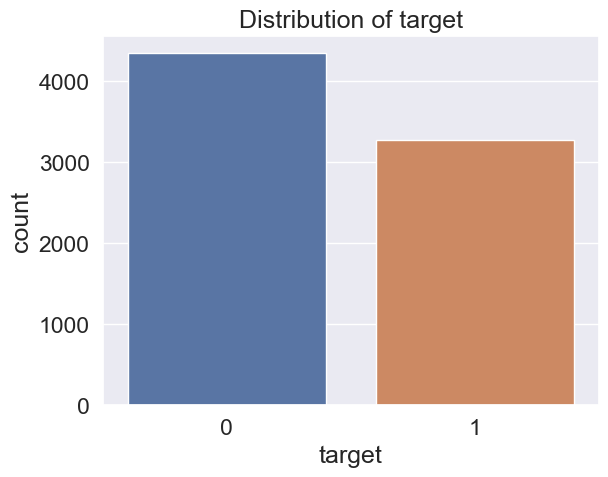

In [27]:
# 探索 target 的分布

# 使用 seaborn 绘制 target 的分布图，taget 为 0 的表示不是真实的灾难信息，为 1 的表示是真实的灾难信息

# 绘制 target 的分布图
plt.title("Distribution of target")
sns.set_style("darkgrid")
sns.countplot(x="target",data=raw)


keyword
derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: count, dtype: int64
keyword
body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
Name: count, dtype: int64


ValueError: Could not interpret input 'keyword'

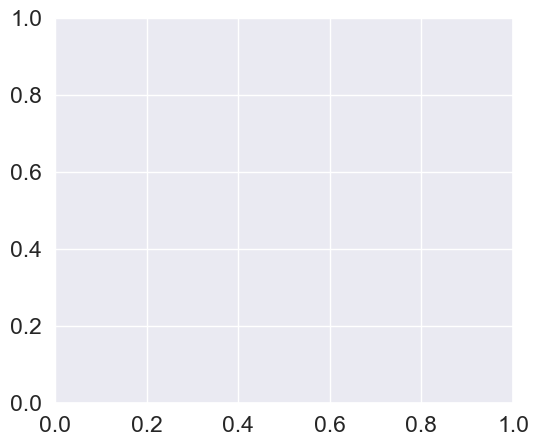

In [45]:
kw_d = raw[raw.target==1].keyword.value_counts().head(10)
kw_nd = raw[raw.target==0].keyword.value_counts().head(10)

print(kw_d)
print(kw_nd)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.countplot(x="keyword",data=kw_d, order=kw_d.index, color='r')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.countplot(y=kw_nd, order=kw_nd.index, color='g')
plt.title('Top keywords for non-disaster tweets')
plt.show()

关键词处理：加载text后面

文本关键词分析 # todo